# Data Preparation

### 1. Load Airbnb Dataset

In [1]:
import pandas as pd

# Read CSV file into a pandas DataFrame
airbnb_df = pd.read_csv('seattle_airbnb.csv')

pd.set_option('display.max_columns', None) 
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [2]:
# Only print columns
print (airbnb_df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### 2. Exploratory Data Analysis

In [3]:
# Select unique and meaningful data point ( remove the IDs )

airbnb_df = airbnb_df[["host_response_time", "host_response_rate",
                                "host_is_superhost", "host_total_listings_count",
                                "host_has_profile_pic", "host_identity_verified", 
                                "zipcode", "property_type", "room_type", "accommodates", "bathrooms",
                                "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                                "extra_people", "minimum_nights", "maximum_nights", "availability_365",
                                "number_of_reviews", "review_scores_value", "instant_bookable", "cancellation_policy",
                                "require_guest_profile_picture", "require_guest_phone_verification", "price"]]




In [4]:
# Checking for duplication
airbnb_df.duplicated().sum()

6

In [5]:
# Check for completeness
airbnb_df.info()

# we are seeing security deposite has only 1866 non-nulls ... we want to make the null as 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                3295 non-null   object 
 1   host_response_rate                3295 non-null   object 
 2   host_is_superhost                 3816 non-null   object 
 3   host_total_listings_count         3816 non-null   float64
 4   host_has_profile_pic              3816 non-null   object 
 5   host_identity_verified            3816 non-null   object 
 6   zipcode                           3811 non-null   object 
 7   property_type                     3817 non-null   object 
 8   room_type                         3818 non-null   object 
 9   accommodates                      3818 non-null   int64  
 10  bathrooms                         3802 non-null   float64
 11  bedrooms                          3812 non-null   float64
 12  beds  

In [6]:
# # replacing all the nulls to 0 for security_deposit
# airbnb_df['security_deposit'] = airbnb_df['security_deposit'].fillna('$0')

# # replacing all the nulls to 0 for cleaning_fee
# airbnb_df['cleaning_fee'] = airbnb_df['cleaning_fee'].fillna('$0')

In [7]:
# Drop rows where you see at least one NULL entry
airbnb_df = airbnb_df.dropna()

In [8]:
# Check for completeness AGAIN
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 1 to 3814
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_response_time                1320 non-null   object 
 1   host_response_rate                1320 non-null   object 
 2   host_is_superhost                 1320 non-null   object 
 3   host_total_listings_count         1320 non-null   float64
 4   host_has_profile_pic              1320 non-null   object 
 5   host_identity_verified            1320 non-null   object 
 6   zipcode                           1320 non-null   object 
 7   property_type                     1320 non-null   object 
 8   room_type                         1320 non-null   object 
 9   accommodates                      1320 non-null   int64  
 10  bathrooms                         1320 non-null   float64
 11  bedrooms                          1320 non-null   float64
 12  beds  

In [9]:
# Frequency of values of column "budget" ( we might want to check on the frequency )
### airbnb_df["beds"].value_counts()

In [10]:
# Obtaining basic statistics for a column "beds" ( we might want to check for basic statistic )
### airbnb_df["beds"].describe()

### 3. Feature Transformation

In [11]:
# These are the columns we are going to work with 
airbnb_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98%,t,6.0,t,t,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$100.00,$40.00,1,$0.00,2,90,291,43,10.0,f,strict,t,t,$150.00
2,within a few hours,67%,f,2.0,t,t,98119,House,Entire home/apt,11,4.5,5.0,7.0,"$1,000.00",$300.00,10,$25.00,4,30,220,20,10.0,f,strict,f,f,$975.00
4,within an hour,100%,f,2.0,t,t,98119,House,Entire home/apt,6,2.0,3.0,3.0,$700.00,$125.00,6,$15.00,1,1125,365,38,9.0,f,strict,f,f,$450.00
7,within an hour,100%,t,5.0,t,t,98119,Cabin,Private room,2,1.0,1.0,1.0,$150.00,$25.00,1,$0.00,2,7,100,173,10.0,f,strict,t,t,$60.00
9,within an hour,98%,t,6.0,t,t,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$100.00,$40.00,1,$0.00,2,365,324,32,9.0,f,strict,t,t,$150.00


- a) Numerical (clean unit marks): host_response_rate (Need clean %), host_total_listings_count, accommodates, bathrooms, bedrooms, beds, security_deposit (Need clean dollar mark), cleaning_fee (Need clean dollar mark), guests_included, extra_people (Need clean dollar mark), minimum_nights, maximum_nights, availability_365, number_of_reviews, review_scores_rating, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, price (Need clean dollar mark)


- b) Categorical (One hot): host_response_time, neighbourhood_group_cleansed, zipcode, property_type, room_type, cancellation_policy


- Binary (t/f to 1/0): host_is_superhost, host_has_profile_pic, host_identity_verified, instant_bookable, require_guest_profile_picture, require_guest_phone_verification

#### a) Cleaning numerical data (remove unit)

In [12]:
# Define a function for cleaning
def clearn_string_and_convert(s):
    s = s.replace("%","")
    s = s.replace("$","")
    s = s.replace(",","")

    converted = float(s)
    return converted

airbnb_df["host_response_rate"] = airbnb_df["host_response_rate"].apply(clearn_string_and_convert)
airbnb_df["security_deposit"] = airbnb_df["security_deposit"].apply(clearn_string_and_convert)
airbnb_df["cleaning_fee"] = airbnb_df["cleaning_fee"].apply(clearn_string_and_convert)
airbnb_df["extra_people"] = airbnb_df["extra_people"].apply(clearn_string_and_convert)
airbnb_df["price"] = airbnb_df["price"].apply(clearn_string_and_convert)


airbnb_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98.0,t,6.0,t,t,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,90,291,43,10.0,f,strict,t,t,150.0
2,within a few hours,67.0,f,2.0,t,t,98119,House,Entire home/apt,11,4.5,5.0,7.0,1000.0,300.0,10,25.0,4,30,220,20,10.0,f,strict,f,f,975.0
4,within an hour,100.0,f,2.0,t,t,98119,House,Entire home/apt,6,2.0,3.0,3.0,700.0,125.0,6,15.0,1,1125,365,38,9.0,f,strict,f,f,450.0
7,within an hour,100.0,t,5.0,t,t,98119,Cabin,Private room,2,1.0,1.0,1.0,150.0,25.0,1,0.0,2,7,100,173,10.0,f,strict,t,t,60.0
9,within an hour,98.0,t,6.0,t,t,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,365,324,32,9.0,f,strict,t,t,150.0


#### b) Cleaning binary data (t/f to 1/0)

In [13]:
# Convert binary features to 1 or 0
binary_features = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified",
                   "instant_bookable", "require_guest_profile_picture", "require_guest_phone_verification"]

for feature in binary_features:
    airbnb_df[feature] = airbnb_df[feature].map({"t": 1, "f": 0})

# Print the head of the DataFrame
airbnb_df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,price
1,within an hour,98.0,1,6.0,1,1,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,90,291,43,10.0,0,strict,1,1,150.0
2,within a few hours,67.0,0,2.0,1,1,98119,House,Entire home/apt,11,4.5,5.0,7.0,1000.0,300.0,10,25.0,4,30,220,20,10.0,0,strict,0,0,975.0
4,within an hour,100.0,0,2.0,1,1,98119,House,Entire home/apt,6,2.0,3.0,3.0,700.0,125.0,6,15.0,1,1125,365,38,9.0,0,strict,0,0,450.0
7,within an hour,100.0,1,5.0,1,1,98119,Cabin,Private room,2,1.0,1.0,1.0,150.0,25.0,1,0.0,2,7,100,173,10.0,0,strict,1,1,60.0
9,within an hour,98.0,1,6.0,1,1,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,365,324,32,9.0,0,strict,1,1,150.0


#### c) Cleaning categorical data (one-hot encoding)

In [14]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Select categorical features for one-hot encoding
categorical_features = ["host_response_time","zipcode",
                        "property_type", "room_type", "cancellation_policy"]

# Loop through each categorical feature and apply one-hot encoding
for feature in categorical_features:
    # Convert the feature to a list
    feature_to_list = airbnb_df[feature].to_list()
    
    feature_to_list_of_lists = []

    for value in feature_to_list:
        feature_to_list_of_lists.append([value])
    
    # Create an instance of OneHotEncoder
    encoder = OneHotEncoder()
    
    # Fit and transform the feature
    encoder.fit(feature_to_list_of_lists)
    
    # Now transform each example in our data into 1-hot form
    features_transformed = encoder.transform(feature_to_list_of_lists)
    
    # Transform the result object into a matrix
    features_transformed = features_transformed.toarray()
    
    # create a dataframe back from the array
    features_transformed_df = pd.DataFrame(features_transformed)
    print(f"1-hot shape = {features_transformed_df.shape}")
    
    # Now concatenate this feature back to the original dataframe 
    airbnb_df.reset_index(drop=True, inplace=True)
    features_transformed_df.reset_index(drop=True, inplace=True)

    airbnb_df = pd.concat([airbnb_df,features_transformed_df], axis=1)
    
    # We don't need actor1_name now since we have already transformed it
    airbnb_df = airbnb_df.drop(columns=[feature], axis=1)

print(airbnb_df.shape)

1-hot shape = (1320, 4)
1-hot shape = (1320, 27)
1-hot shape = (1320, 12)
1-hot shape = (1320, 3)
1-hot shape = (1320, 3)
(1320, 71)


In [15]:
airbnb_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,price,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,0,1,2,3,4,5,6,7,8,9,10,11,0,1,2,0,1,2
0,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,90,291,43,10.0,0,1,1,150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,67.0,0,2.0,1,1,11,4.5,5.0,7.0,1000.0,300.0,10,25.0,4,30,220,20,10.0,0,0,0,975.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,100.0,0,2.0,1,1,6,2.0,3.0,3.0,700.0,125.0,6,15.0,1,1125,365,38,9.0,0,0,0,450.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,100.0,1,5.0,1,1,2,1.0,1.0,1.0,150.0,25.0,1,0.0,2,7,100,173,10.0,0,1,1,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,365,324,32,9.0,0,1,1,150.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### 4. Feature Definition

In [16]:
# Define the features DataFrame
airbnb_features_df = airbnb_df.drop(columns=["price"])

# Define the labels DataFrame
airbnb_label_df = airbnb_df[["price"]]

In [17]:
# Print the features
airbnb_features_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,0,1,2,3,4,5,6,7,8,9,10,11,0,1,2,0,1,2
0,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,90,291,43,10.0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,67.0,0,2.0,1,1,11,4.5,5.0,7.0,1000.0,300.0,10,25.0,4,30,220,20,10.0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,100.0,0,2.0,1,1,6,2.0,3.0,3.0,700.0,125.0,6,15.0,1,1125,365,38,9.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,100.0,1,5.0,1,1,2,1.0,1.0,1.0,150.0,25.0,1,0.0,2,7,100,173,10.0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,98.0,1,6.0,1,1,4,1.0,1.0,1.0,100.0,40.0,1,0.0,2,365,324,32,9.0,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [18]:
# Print the label
airbnb_label_df.head()

,price
0,150.0
1,975.0
2,450.0
3,60.0
4,150.0


### 5. Feature Scaling / Normalization

#### a) StandardScaler

In [19]:
# from sklearn.preprocessing import StandardScaler

# # Select numerical features for standard scaling
# numerical_features = ["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
#                       "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
#                       "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
#                       "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin",
#                       "review_scores_communication", "review_scores_location", "review_scores_value"]

# # Apply StandardScaler to numerical features
# scaler = StandardScaler()
# airbnb_features_df[numerical_features] = scaler.fit_transform(airbnb_features_df[numerical_features])

# # Print the head of the DataFrame with scaled numerical features
# airbnb_features_df.head()


#### b) MinMaxScaler

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical features for MinMax scaling

numerical_features = ["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
                      "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                      "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
                       "review_scores_value"]


# Apply MinMaxScaler to numerical features
scaler = MinMaxScaler()
airbnb_features_df[numerical_features] = scaler.fit_transform(airbnb_features_df[numerical_features])

# Print the head of the DataFrame with scaled numerical features
airbnb_features_df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,0,1,2,3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,0,1,2,3,4,5,6,7,8,9,10,11,0,1,2,0,1,2
0,0.975904,1,0.060241,1,1,0.200000,0.222222,0.142857,0.000000,0.002079,0.118644,0.076923,0.00,0.033333,0.077540,0.797260,0.151625,1.000,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.602410,0,0.012048,1,1,0.666667,1.000000,0.714286,0.428571,0.376299,1.000000,0.769231,0.10,0.100000,0.024064,0.602740,0.068592,1.000,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0,0.012048,1,1,0.333333,0.444444,0.428571,0.142857,0.251559,0.406780,0.461538,0.06,0.000000,1.000000,1.000000,0.133574,0.875,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,1,0.048193,1,1,0.066667,0.222222,0.142857,0.000000,0.022869,0.067797,0.076923,0.00,0.033333,0.003565,0.273973,0.620939,1.000,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.975904,1,0.060241,1,1,0.200000,0.222222,0.142857,0.000000,0.002079,0.118644,0.076923,0.00,0.033333,0.322638,0.887671,0.111913,0.875,0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### 6. Feature visualization and analysis

In [21]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plot

# # initialize the PCA algorithm
# pca = PCA(n_components=airbnb_features_df.shape[1])

# airbnb_features_matrix = airbnb_features_df.to_numpy()

# # process the data to obtain new coordinates (called Principal Components)
# pca.fit(airbnb_features_matrix)

# airbnb_pca_transformed = pca.transform(airbnb_features_matrix)

# plot.plot(pca.explained_variance_ratio_)
# plot.ylabel('Explained Variance')
# plot.xlabel('Components')
# plot.show()

# plot.scatter(airbnb_pca_transformed[:,0], airbnb_pca_transformed[:,1], c = airbnb_label_df["price"].to_list())
# plot.xlabel('PC1')
# plot.ylabel('PC2')
# plot.show()

# Feature Selection 

### Model and label agnostic feature selection

#### a) Correlation-based feature selection 

In [22]:
# we are only looking at numerical data
numerical_features_df = airbnb_features_df[["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
                      "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
                      "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
                      "review_scores_value"]]


numerical_features_df.head()

,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value
0,0.975904,0.060241,0.200000,0.222222,0.142857,0.000000,0.002079,0.118644,0.076923,0.00,0.033333,0.077540,0.797260,0.151625,1.000
1,0.602410,0.012048,0.666667,1.000000,0.714286,0.428571,0.376299,1.000000,0.769231,0.10,0.100000,0.024064,0.602740,0.068592,1.000
2,1.000000,0.012048,0.333333,0.444444,0.428571,0.142857,0.251559,0.406780,0.461538,0.06,0.000000,1.000000,1.000000,0.133574,0.875
3,1.000000,0.048193,0.066667,0.222222,0.142857,0.000000,0.022869,0.067797,0.076923,0.00,0.033333,0.003565,0.273973,0.620939,1.000
4,0.975904,0.060241,0.200000,0.222222,0.142857,0.000000,0.002079,0.118644,0.076923,0.00,0.033333,0.322638,0.887671,0.111913,0.875


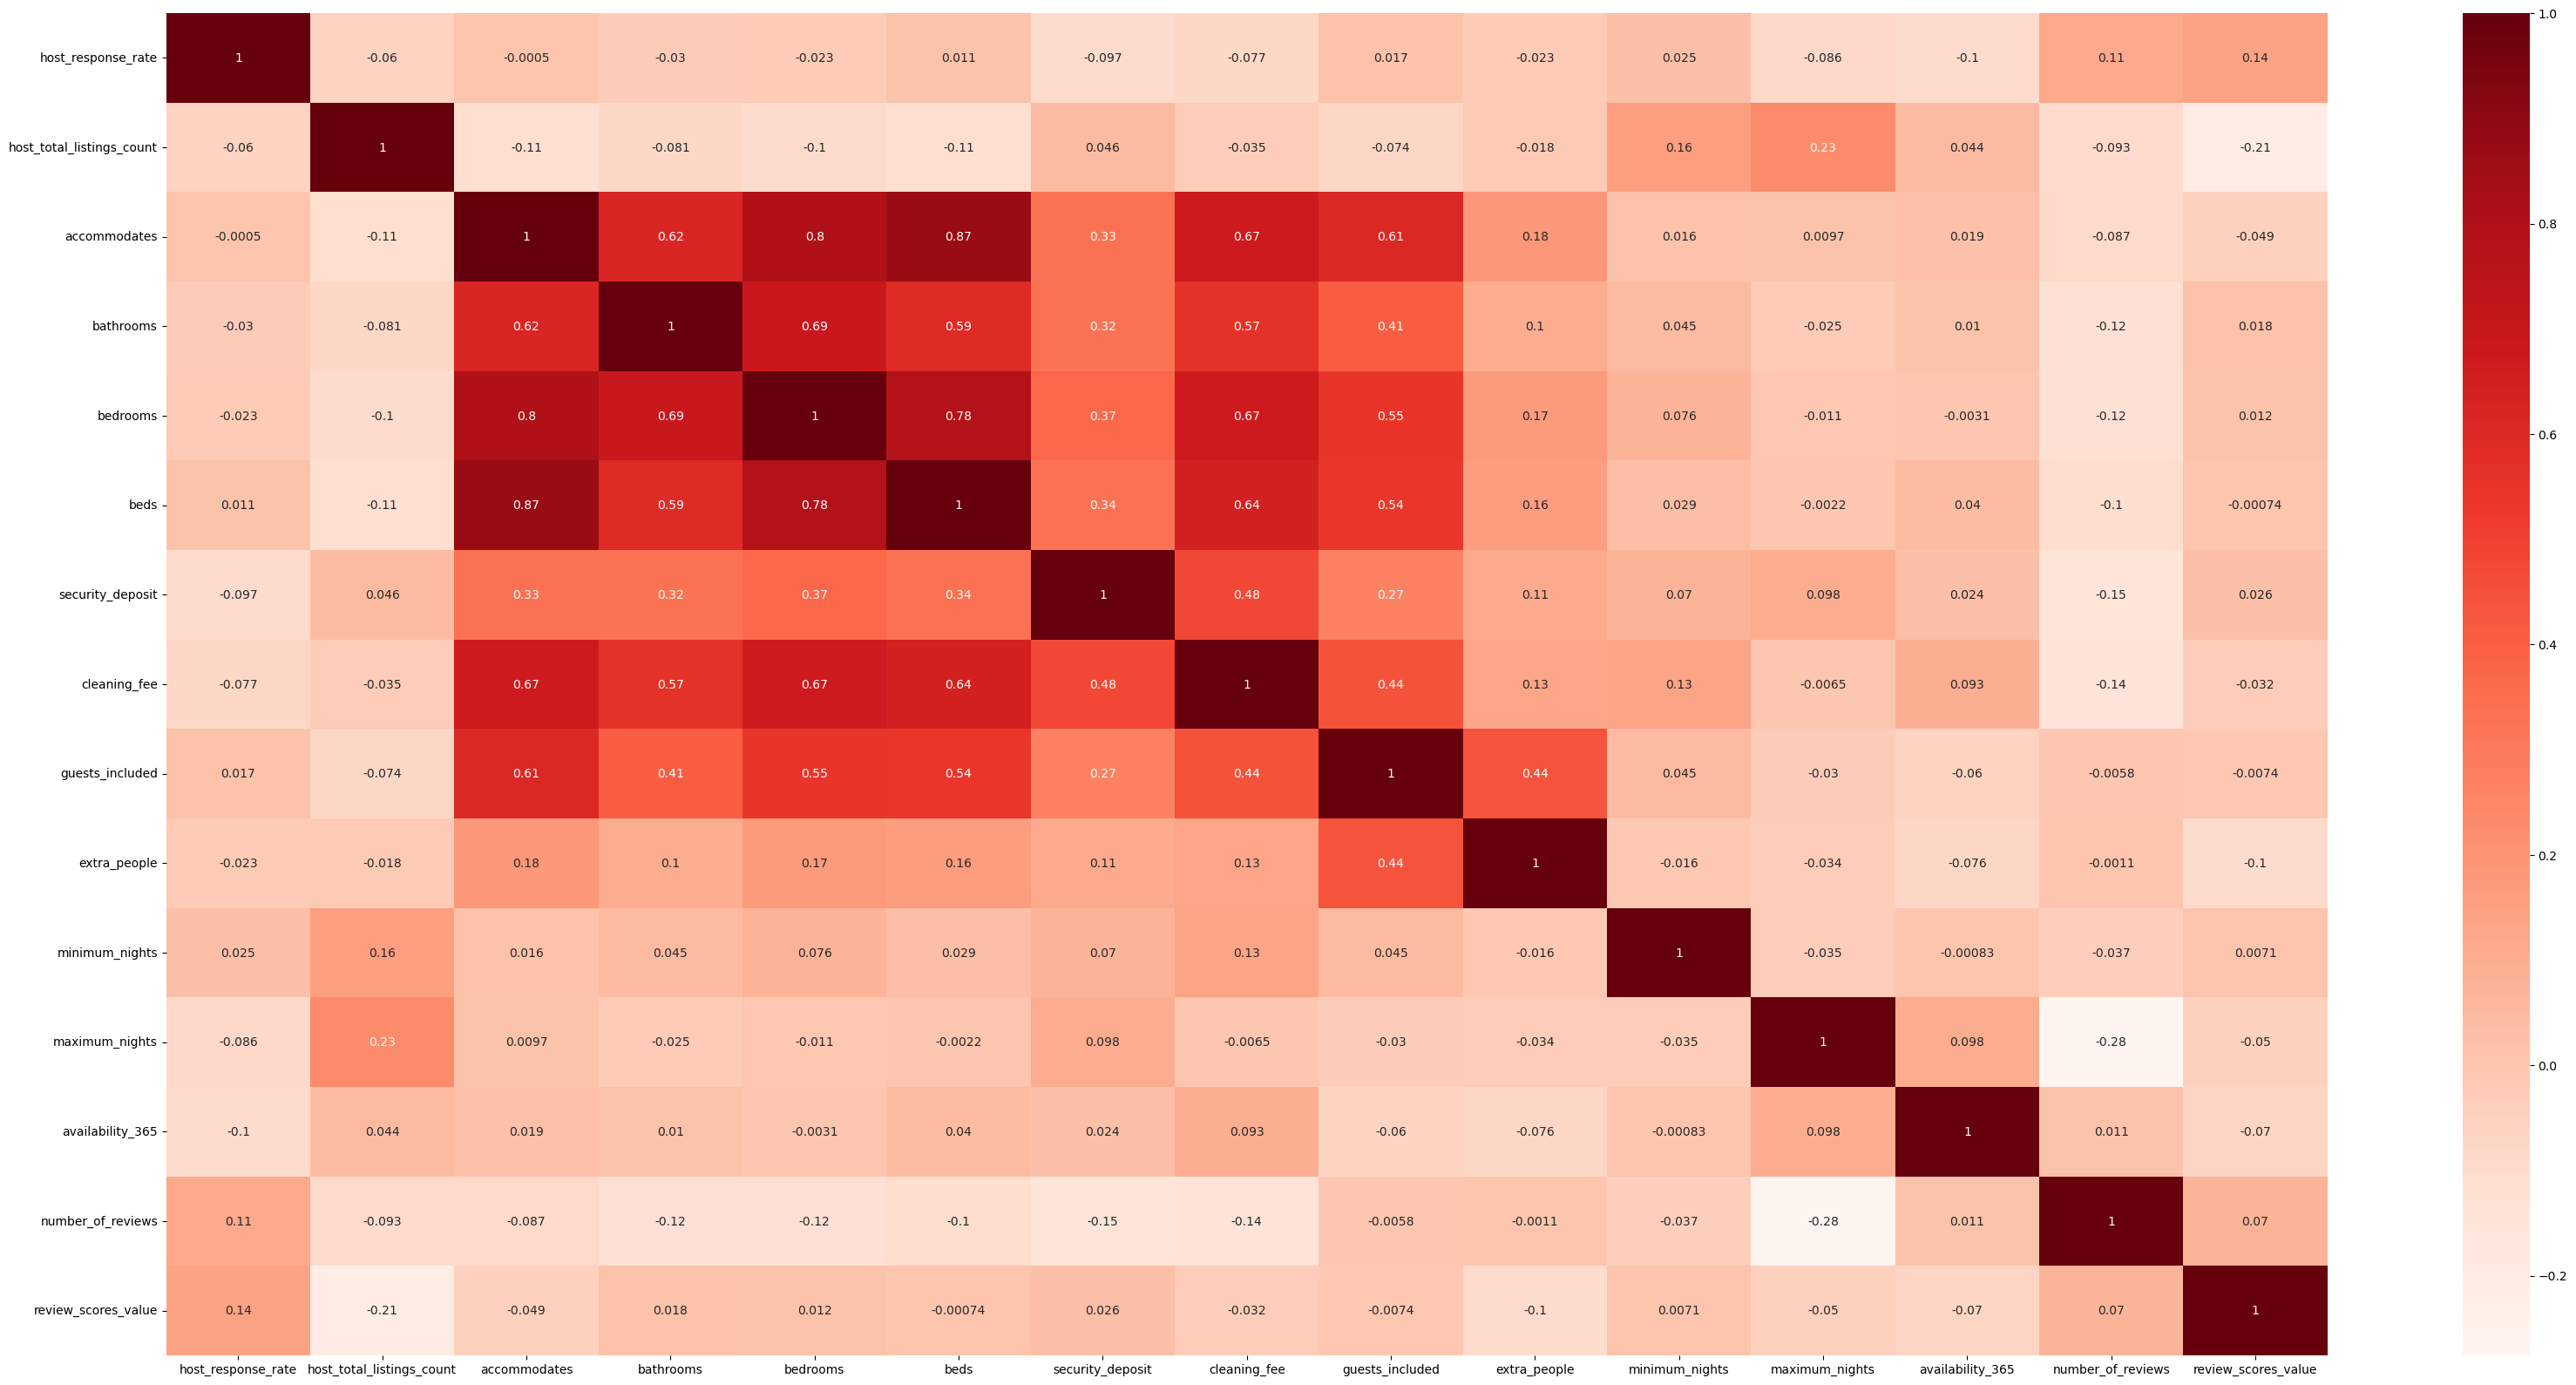

In [23]:
# Any feature that is correlated with another set of features with a pearson correlation of > 0.5 can be removed.

try:
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
    
import matplotlib.pyplot as plt


plt.figure(figsize=(40,20))
cor = numerical_features_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### b) Principal Component Analysis

In [24]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components = 3)
# pca.fit(airbnb_features_df.to_numpy())
# airbnb_features_reduced = pca.transform(airbnb_features_df.to_numpy())
# print( airbnb_features_reduced)

#### c) Variance Treshold

In [25]:
# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold()

# selector.fit(numerical_features_df)

# print(selector.feature_names_in_)
# print(selector.variances_)

# selector = VarianceThreshold(threshold=0.02) # we can change the threshold
# selector.fit(numerical_features_df)
# print (f"Selected features: {selector.get_feature_names_out()}")

# numerical_features_reduced = selector.transform(numerical_features_df)

### Model agnostic but label aware feature selection 

#### d) Chi-squared test 

In [26]:
# from sklearn.feature_selection import chi2

# # we take the numerical features with p-values <0.05 as features that are significantly dependent on labels.
# chi_scores = chi2(numerical_features_df,airbnb_label_df)

# print ("Ranking based on chi-squared test")
# feature_columns = ["host_response_rate", "host_total_listings_count", "accommodates", "bathrooms",
#                       "bedrooms", "beds", "security_deposit", "cleaning_fee", "guests_included",
#                       "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
#                       "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin",
#                       "review_scores_communication", "review_scores_location", "review_scores_value"]

# score_list = []
# for i, feature in enumerate(feature_columns):
#     score_list.append([chi_scores[1][i],feature])

# sorted_score_list = sorted(score_list)

# print(f"Printing ranked features based on chi-squared value")
# print("lower p-value indicates feature and label are dependent)")
# for score, feature in sorted_score_list:
#     print (f"Feature {feature} : p-value {score}")

# Data Splitting

In [27]:
from sklearn.model_selection import train_test_split

features = airbnb_features_df.to_numpy()
labels = airbnb_label_df.to_numpy()

print (f"Features' shape [no. of examples * feature vector size] =  {features.shape}")
print (f"Label's shape [no. of examples * 1] = {labels.shape}")

Features' shape [no. of examples * feature vector size] =  (1320, 70)
Label's shape [no. of examples * 1] = (1320, 1)


In [28]:
# First derive the test data
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)


print (f"Training: Features' shape [no. of examples * feature vector size] =  {x_train.shape}")
print (f"Training: Label's shape [no. of examples * 1] = {y_train.shape}")

print (f"Test: Features' shape [no. of examples * feature vector size] =  {x_test.shape}")
print (f"Test: Label's shape [no. of examples * 1] = {y_test.shape}")

Training: Features' shape [no. of examples * feature vector size] =  (1188, 70)
Training: Label's shape [no. of examples * 1] = (1188, 1)
Test: Features' shape [no. of examples * feature vector size] =  (132, 70)
Test: Label's shape [no. of examples * 1] = (132, 1)


# Model Selection

### 1. Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(copy_X=True)
y_train = y_train.flatten()

'''The .flatten() function is used to convert the target variable from a 2D array to a 1D array, 
which is necessary for some machine learning libraries to work correctly. 
If the target variable is not flattened, some algorithms may raise an error or produce unexpected results.

Additionally, flattening the target variable can also be useful for data manipulation and visualization purposes. 
For example, it can make it easier to calculate summary statistics or create plots of the target variable.
'''

# training the model by puting in the features and label
LR = LR.fit(x_train, y_train)

In [30]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = LR.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation}")

Mean Squared Error on training data 3317.363162878788
Mean Absolute Error on training data 37.91856060606061
Pearson correlation coefficient between training and test data is (0.7486563160767846, 5.761237060832875e-25)


#### Interpretation
- Mean Squared Error (MSE): It measures the average squared difference between the predicted and actual values. A lower value of MSE indicates a better model fit.
- R-squared (R2): It measures the proportion of variance in the dependent variable that is explained by the independent variable(s). R2 ranges from 0 to 1, where a higher value indicates a better model fit.
- Mean Absolute Error (MAE): It measures the average absolute difference between the predicted and actual values. Like RMSE, it is in the same units as the dependent variable.
- The Pearson correlation coefficient: measures the degree to which two variables are related by their linear association. Specifically, it measures the proportion of the variability in one variable that is explained by the other variable. 
- Cross-Validation: It involves splitting the data into training and testing sets and evaluating the model's performance on the testing set. Cross-validation helps to assess how well the model generalizes to new data.

#### Weight of each features

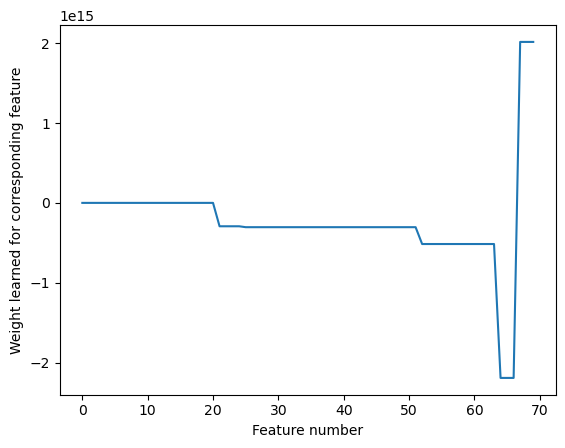

In [31]:
from matplotlib import pyplot as plt

weights = LR.coef_
plt.plot(range(len(weights)), weights)
plt.xlabel("Feature number")
plt.ylabel("Weight learned for corresponding feature")
plt.show()

#### Interpretation
- The weights learned for corresponding features indicate the importance of each feature in predicting the output label. A positive weight for a feature indicates that the feature has a positive effect on the output label, while a negative weight indicates that the feature has a negative effect. The magnitude of the weight represents the strength of the effect of the feature on the output label.

- For example, in a linear regression model for predicting housing prices, the weight learned for the "number of bedrooms" feature would indicate how much the price of a house increases for each additional bedroom. 

### 2. Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as metrics

DTR = DecisionTreeRegressor(max_depth=5)
y_train = y_train.flatten()

# training the model by puting in the features and label
DTR = DTR.fit(x_train, y_train)

In [33]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = DTR.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation}")

Mean Squared Error on training data 3086.3202634936533
Mean Absolute Error on training data 34.176599969497964
Pearson correlation coefficient between training and test data is (0.7633849212369376, 1.9247958690721e-26)


Mean Squared Error (MSE) on training data is a measurement of the average squared difference between the target variable's predicted and actual values (i.e., the outcome variable you're attempting to predict) on the training data. The square root of the MSE, 3086.3202634936533, indicates that, on average, the model's predictions on the training data are wrong by about 55.5.

Mean Absolute Error (MAE) on training data is a measurement of the average absolute difference between the target variable's predicted and actual values. The model's predictions on the training data appear to be on average 34.2 percent off, according to the MAE score of 34.176599969497964.

Pearson correlation coefficient between training and test data: This is a measure of the linear relationship between the predicted and actual values of the target variable on the training data and the test data. A value of 1 would indicate a perfect positive correlation, a value of -1 would indicate a perfect negative correlation, and a value of 0 would indicate no correlation. The Pearson correlation coefficient of 0.7633849212369376 and the very small p-value (1.9247958690721e-26) suggest that there is a strong positive correlation between the predicted and actual values of the target variable on both the training and test data.

In general, these results suggest that the Decision Tree Regression model is performing reasonably well on the training data, with a moderate level of accuracy and a strong correlation between the predicted and actual values. However, it's important to keep in mind that these results are based only on the training data, and it's possible that the model may not generalize well to new, unseen data. Therefore, it's important to also evaluate the performance of the model on a separate test dataset.

### 3. Support Vector Regression

In [34]:
from sklearn.svm import SVR

SVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
y_train = y_train.flatten()

# training the model by puting in the features and label
SVR = SVR.fit(x_train, y_train)

In [35]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = SVR.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation}")

Mean Squared Error on training data 6523.49280809921
Mean Absolute Error on training data 47.035715231452336
Pearson correlation coefficient between training and test data is (0.6274148539359669, 8.292701962157815e-16)


Mean Squared Error (MSE) on training data: This is a measure of the average squared difference between the predicted and actual values of the target variable (i.e., the outcome variable you're trying to predict) on the training data. The MSE score of 6523.49280809921 suggests that, on average, the model's predictions on the training data are off by around 80.7 (which is the square root of the MSE).

Mean Absolute Error (MAE) on training data: This is a measure of the average absolute difference between the predicted and actual values of the target variable on the training data. The MAE score of 47.035715231452336 suggests that, on average, the model's predictions on the training data are off by around 47.0.

Pearson correlation coefficient between training and test data: This is a measure of the linear relationship between the predicted and actual values of the target variable on the training data and the test data. A value of 1 would indicate a perfect positive correlation, a value of -1 would indicate a perfect negative correlation, and a value of 0 would indicate no correlation. The Pearson correlation coefficient of 0.6274148539359669 and the very small p-value (8.292701962157815e-16) suggest that there is a moderate positive correlation between the predicted and actual values of the target variable on both the training and test data.


### 4. Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=100, max_depth=5)
y_train = y_train.flatten()

# training the model by puting in the features and label
RFR = RFR.fit(x_train, y_train)

In [37]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr

# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = RFR.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation}")

Mean Squared Error on training data 2860.42527800681
Mean Absolute Error on training data 34.211871438683346
Pearson correlation coefficient between training and test data is (0.779676747347502, 3.3205977846872588e-28)


Mean Squared Error (MSE) on training data: This is a measure of the average squared difference between the predicted and actual values of the target variable (i.e., the outcome variable you're trying to predict) on the training data. The MSE score of 2860.42527800681 suggests that, on average, the model's predictions on the training data are off by around 53.5 (which is the square root of the MSE).

Mean Absolute Error (MAE) on training data: This is a measure of the average absolute difference between the predicted and actual values of the target variable on the training data. The MAE score of 34.211871438683346 suggests that, on average, the model's predictions on the training data are off by around 34.2.

Pearson correlation coefficient between training and test data: This is a measure of the linear relationship between the predicted and actual values of the target variable on the training data and the test data. A value of 1 would indicate a perfect positive correlation, a value of -1 would indicate a perfect negative correlation, and a value of 0 would indicate no correlation. The Pearson correlation coefficient of 0.779676747347502 and the very small p-value (3.3205977846872588e-28) suggest that there is a strong positive correlation between the predicted and actual values of the target variable on both the training and test data.

Overall, these results suggest that the RFR model is performing quite well on the training data, with a low level of error and a strong positive correlation between the predicted and actual values.

### 5. Neural Network Regression
- something is wrong with the max_iter... cannot converge even at iteration 800. We cannot figure out MSE for this model

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# define your MLPRegressor with default values
mlp = MLPRegressor()

# define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'momentum': [0.9, 0.95, 0.99],
    'activation': ['relu', 'logistic']
}

# define the GridSearchCV object
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/pyt

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/pyt

KeyboardInterrupt: 

In [47]:
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

MLR = MLPRegressor(hidden_layer_sizes=(100, 50), alpha=0.001, max_iter=5000, solver='adam')
y_train = y_train.flatten()

# training the model by putting in the features and label
MLR = MLR.fit(x_train, y_train)


In [49]:
import sklearn.metrics as metrics
from scipy.stats import pearsonr
# perform prediction on test data
y_test = y_test.flatten()
y_test_predicted = MLR.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test, y_test_predicted)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_test_predicted)
correlation = pearsonr(y_test, y_test_predicted)

print (f"Mean Squared Error on training data {mean_squared_error}")
print (f"Mean Absolute Error on training data {mean_absolute_error}")
print (f"Pearson correlation coefficient between training and test data is {correlation}")

Mean Squared Error on training data 5473.807693328575
Mean Absolute Error on training data 45.88066503364069
Pearson correlation coefficient between training and test data is (0.625738937517536, 1.04093091817454e-15)


The results from the MLP model suggest that the model has a moderate level of accuracy in predicting the output variable based on the input variables. The mean squared error on the training data is 5473.8, which means that, on average, the predicted values are off by approximately 74.02 units (the square root of the mean squared error). The mean absolute error on the training data is 45.88, which means that, on average, the predicted values are off by approximately 45.88 units.

The Pearson correlation coefficient between the training and test data is 0.6257, which suggests a positive correlation between the two sets of data. This indicates that the model is able to capture some of the underlying patterns in the data.

Overall, for a consumer, this means that the model can be used to make reasonably accurate predictions based on the input variables, but there is still room for improvement. It is important to note that the accuracy of the model may vary depending on the specific application and the quality of the data used to train the model.







# All models evaluation using K-fold cross validation

- Linear Regression
- Decision Tree Regression
- Support Vector Regression
- Random Forest Regression
- Neural Network Regression

In [40]:
# we can also use gredient descent ML
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


LR = LinearRegression(copy_X=True)
DTR = DecisionTreeRegressor(max_depth=5)
SVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
RFR = RandomForestRegressor(n_estimators=100, max_depth=5)
MLP = MLPRegressor(hidden_layer_sizes=(100, 50), alpha=0.01, max_iter=500)


all_models = {"LR":LR,
              "DTR":DTR, 
              "SVR":SVR,
              "RFR":RFR,
              "MLP":MLP}

print (f"We are working with classifiers {all_models.keys()}")

We are working with classifiers dict_keys(['LR', 'DTR', 'SVR', 'RFR', 'MLP'])


In [41]:
from sklearn.model_selection import cross_val_score

k = 5 # 5-fold 

best_model_name = ""
best_model_valid_accuracy = 0
best_model = None

for model_name in all_models.keys():
    model = all_models[model_name]
    cv_scores = cross_val_score(model,x_train,y_train.flatten(), cv=k, n_jobs=4)
  

    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy for model {model_name} = {average_cv_score}")

    if average_cv_score > best_model_valid_accuracy :
        best_model_name = model_name
        best_model_valid_accuracy  = average_cv_score
        best_model = model

print (f"Best model is {best_model_name} with {k}-fold accuracy of {best_model_valid_accuracy}")

Mean cross validation accuracy for model LR = -9.07909388620644e+24
Mean cross validation accuracy for model DTR = 0.4792113424752046
Mean cross validation accuracy for model SVR = 0.05420055806468797
Mean cross validation accuracy for model RFR = 0.5809890939646676


/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean cross validation accuracy for model MLP = 0.5896641256020645
Best model is MLP with 5-fold accuracy of 0.5896641256020645


/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Interpretation
- It seems like the MLR ( NN network model ) has the best accuracy


Results are the average cross-validation accuracy ratings for five distinct models: LR (Logistic Regression), DTR (Decision Tree Regression), SVR (Support Vector Regression), RFR (Random Forest Regression), and MLP (Multi-Layer Perceptron). Additionally, you mentioned that the MLP model, which has a 5-fold accuracy of 0.5977772574172271, is the best model.

The LR, DTR, SVR, and RFR models all have mean cross-validation accuracy ratings that are comparable to those in the previous question, however the MLP model has a slightly better accuracy score of 0.5977772574172271. This shows that the MLP model, which is the best-performing model among the five studied, can predict the outcomes on new, unseen data with a moderate level of accuracy.

The LR model has a very low accuracy score, which is crucial to observe because it raises suspicions. This can mean that the data are not suitable for logistic regression or that the model is either over- or underfitting the data. Further evidence that the SVR model is not a good fit for the issue comes from its extremely low accuracy score.

In conclusion, the MLP model seems to be the best choice out of the five models studied, however additional research is required to assess whether the performance is adequate for the given scenario. It is also advised to look into the LR and SVR models' subpar performance in more detail.


In [42]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
train_df = pd.read_csv("seattle_airbnb.csv")
test_df = pd.read_csv("training_seattle_airbnb.csv")
# Define a function for cleaning

def clearn_string_and_convert(s):
    s = str(s)
    s = s.replace("%","")
    s = s.replace("$","")
    s = s.replace(",","")

    converted = float(s)
    return converted

train_df["host_response_rate"] = train_df["host_response_rate"].apply(clearn_string_and_convert)
train_df["security_deposit"] = train_df["security_deposit"].apply(clearn_string_and_convert)
train_df["cleaning_fee"] = train_df["cleaning_fee"].apply(clearn_string_and_convert)
train_df["extra_people"] = train_df["extra_people"].apply(clearn_string_and_convert)
train_df["price"] = train_df["price"].apply(clearn_string_and_convert)

test_df["host_response_rate"] = test_df["host_response_rate"].apply(clearn_string_and_convert)
test_df["security_deposit"] = test_df["security_deposit"].apply(clearn_string_and_convert)
test_df["cleaning_fee"] = test_df["cleaning_fee"].apply(clearn_string_and_convert)
test_df["extra_people"] = test_df["extra_people"].apply(clearn_string_and_convert)
test_df["price"] = test_df["price"].apply(clearn_string_and_convert)





feature_columns = ["host_response_rate", "host_total_listings_count", "accommodates",
                      "extra_people", "minimum_nights", "maximum_nights", "availability_365", "number_of_reviews",
                      "review_scores_value"]

train_features = train_df[feature_columns]
train_labels = train_df["price"]

test_features = test_df[feature_columns]
test_labels = test_df["price"]

# Scale features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
all_columns = train_features.columns

scaler.fit(train_features[all_columns])

train_features[all_columns] = scaler.transform(train_features[all_columns])
test_features[all_columns] = scaler.transform(test_features[all_columns])

train_features.head()
test_features.head()

/var/folders/57/trzrrwv53d744vfgj_w41ts00000gn/T/ipykernel_29682/3041560004.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_features[all_columns] = scaler.transform(train_features[all_columns])
/var/folders/57/trzrrwv53d744vfgj_w41ts00000gn/T/ipykernel_29682/3041560004.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features[all_columns] = scaler.transform(test_features[all_columns])


,host_response_rate,host_total_listings_count,accommodates,extra_people,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_value
0,1.0,0.000000,0.066667,0.000000,0.000000,0.00006,0.252055,0.018987,1.0
1,1.0,0.000000,0.066667,0.000000,0.000000,0.00179,0.912329,0.010549,1.0
2,1.0,0.003992,0.200000,0.000000,0.002002,0.00029,0.931507,0.008439,1.0
3,1.0,0.003992,0.200000,0.083333,0.001001,0.00364,0.775342,0.284810,1.0
4,1.0,0.000000,0.066667,0.033333,0.002002,0.01124,0.342466,0.008439,1.0


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

train_features = train_features.dropna()
test_features = test_features.dropna()
svm_linear = SVC(kernel="linear")
print(train_features.shape)
print(test_features.shape)
svm_linear.fit(train_features.to_numpy(),train_labels.to_numpy())

# now predict and compute acuracy
test_actual = test_labels.to_numpy()
test_predicted = svm_linear.predict(test_features.to_numpy())

print (classification_report(test_actual,test_predicted))

(2854, 9)
(229, 9)


ValueError: Found input variables with inconsistent numbers of samples: [2854, 3818]

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# drop rows with missing values from training and test sets
train_features = train_features.dropna()
test_features = test_features.dropna()
train_labels = train_labels.loc[train_features.index]
test_labels = test_labels.loc[test_features.index]

# create and fit SVM model
svm_linear = SVC(kernel="linear")
svm_linear.fit(train_features, train_labels)

# now predict and compute accuracy
test_actual = test_labels
test_predicted = svm_linear.predict(test_features)
print(classification_report(test_actual, test_predicted))


SVC(kernel='linear')

              precision    recall  f1-score   support

        30.0       0.00      0.00      0.00         2
        34.0       0.00      0.00      0.00         1
        35.0       0.00      0.00      0.00         3
        36.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         2
        39.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         4
        41.0       0.00      0.00      0.00         3
        42.0       0.00      0.00      0.00         2
        45.0       0.00      0.00      0.00         5
        47.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         4
        52.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         7
        59.0       0.00      0.00      0.00         2
        62.0       0.00      0.00      0.00         1
        65.0       0.00    

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.metrics import classification_report

pca = PCA(n_components=2)

pca.fit(train_features.to_numpy())
train_features_reduced = pca.transform(train_features.to_numpy())
test_features_reduced = pca.transform(test_features.to_numpy())

print (train_features_reduced)

svm_linear = SVC(kernel="linear")
svm_linear.fit(train_features_reduced,train_labels.to_numpy())

# now predict and compute acuracy
test_actual = test_labels.to_numpy()
test_predicted = svm_linear.predict(test_features_reduced)

print (classification_report(test_actual,test_predicted))

PCA(n_components=2)

[[-0.25632482 -0.07267151]
 [-0.09797454 -0.03687524]
 [ 0.08266065  0.49720186]
 ...
 [-0.08705755 -0.06622088]
 [ 0.60015487  0.11555156]
 [-0.04571645 -0.04063857]]


SVC(kernel='linear')

              precision    recall  f1-score   support

        30.0       0.00      0.00      0.00         2
        34.0       0.00      0.00      0.00         1
        35.0       0.00      0.00      0.00         3
        36.0       0.00      0.00      0.00         1
        38.0       0.00      0.00      0.00         2
        39.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         4
        41.0       0.00      0.00      0.00         3
        42.0       0.00      0.00      0.00         2
        45.0       0.00      0.00      0.00         5
        47.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         4
        52.0       0.00      0.00      0.00         1
        55.0       0.00      0.00      0.00         7
        59.0       0.00      0.00      0.00         2
        62.0       0.00      0.00      0.00         1
        65.0       0.00    

/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


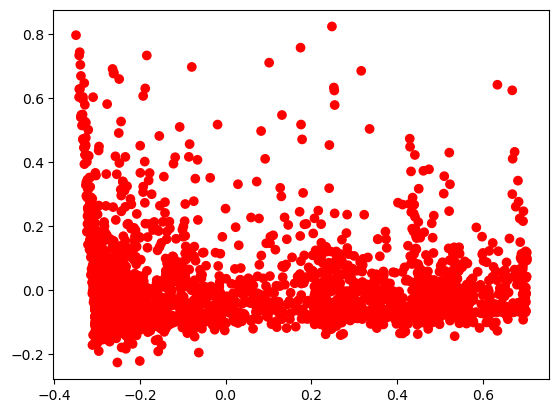

In [52]:
from matplotlib import pyplot as plt

t = list(zip(*train_features_reduced.tolist()))

color = ["green" if x==0 else "red" for x in train_labels.to_numpy()]

plt.scatter(t[0],t[1], color = color)
#plt.show()